<a href="https://colab.research.google.com/github/zahraa-elhareedy/Network_Anomaly_Detection/blob/main/Network_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Unzip the Datasets

In [ ]:
# Load training data /kddcup.data_10_percent.gz
train_data = pd.read_csv("/kddcup.data_10_percent.gz", header=None)
# Load test data
test_data = pd.read_csv("/corrected.gz", header=None)
print(train_data.shape)
print(test_data.shape)

(494021, 42)
(311029, 42)


Load and parse columns' headings

In [ ]:
with open('/kddcup.names.txt') as f:
    headings_file = f.readlines()
col_names = []
for index in range(1, len(headings_file)):
  col_name = headings_file[index].split(':')[0]
  col_names.append(col_name)
col_name = 'target'
col_names.append(col_name)
len(col_names)

42

Assign column headings

In [ ]:
train_data.columns = col_names
test_data.columns = col_names


In [ ]:
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 10)
display(train_data)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [ ]:
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 10)
display(test_data)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


Preprocessing

In [ ]:
train_data.drop_duplicates(keep = 'first', inplace = True , ignore_index=True)
test_data.drop_duplicates(keep = 'first', inplace = True , ignore_index=True)
print(train_data.shape)
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 10)
display(test_data)

(145586, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,domain_u,SF,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.5,1.0,0.0,10,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77286,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55,55,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
77287,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,56,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
77288,0,udp,private,SF,105,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
77289,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67,67,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
copied_train_data = train_data.copy()

In [ ]:
train_name_labels = copied_train_data["target"]
split_train, split_test = train_test_split(train_data, train_size=0.025, random_state=42, stratify=train_name_labels)

In [ ]:
copied_split_train = split_train.copy()
split_train_name_labels = copied_split_train["target"]
print(split_train_name_labels)

72232      normal.
75829     neptune.
50594     neptune.
75492     neptune.
129474    neptune.
            ...   
26682      normal.
24770      normal.
144916     normal.
109068    neptune.
83874      normal.
Name: target, Length: 3639, dtype: object


In [ ]:
#sample_train_data = train_data.sample(n=5000, random_state=42)
#sample_test_data = test_data.sample(n=5000, random_state=42)

Apply label encoding for labels of both train and test datasets

In [ ]:
# Combine the training and testing data into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=0)
combined_data['target'] = LabelEncoder().fit_transform(combined_data['target'])
# Split the combined data back into training and testing data
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]
print(train_data.shape)
train_labels_nos = train_data.copy()["target"]
train_name_labels = train_name_labels.astype(str)
pairs =  np.column_stack((train_name_labels,train_labels_nos))
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 10)
pairs = pd.DataFrame(pairs)
pairs.drop_duplicates(keep = 'first', inplace = True , ignore_index=True)
print(pairs)
display(test_data)

(145586, 42)
                   0   1
0            normal.  16
1   buffer_overflow.   2
2        loadmodule.   9
3              perl.  17
4           neptune.  14
..               ...  ..
18         multihop.  12
19      warezmaster.  35
20      warezclient.  34
21              spy.  30
22          rootkit.  23

[23 rows x 2 columns]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,28
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,28
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,28
4,0,udp,domain_u,SF,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.5,1.0,0.0,10,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77286,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55,55,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,16
77287,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,56,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,16
77288,0,udp,private,SF,105,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,28
77289,0,icmp,ecr_i,SF,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67,67,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,16


One hot encoding

In [ ]:
def get_categorical_col(data_set):
  # Identifying categorical features
  numeric_cols = data_set._get_numeric_data().columns # gets all the numeric column names
  categorical_cols = list(set(data_set.columns)-set(numeric_cols))
  print(categorical_cols)
  return categorical_cols

In [ ]:
categorical_cols = get_categorical_col(combined_data)

['flag', 'service', 'protocol_type']


In [ ]:
#combined_data = pd.get_dummies(combined_data, columns=categorical_cols)
#test_data = pd.get_dummies(sample_test_data, columns=categorical_cols)

In [ ]:
def encode_categorical_columns(data_set,categorical_cols):
  for col in categorical_cols:
      encoder = LabelEncoder()
      data_set[col] = encoder.fit_transform(data_set[col])
      binary_cols = pd.get_dummies(data_set[col], prefix=col)
      data_set = pd.concat([data_set, binary_cols], axis=1)
      data_set = data_set.drop([col], axis=1)
  print(data_set.shape)
  pd.set_option('display.max_columns', 41)
  pd.set_option('display.max_rows', 10)
  display(data_set)
  return data_set

In [ ]:
combined_data = encode_categorical_columns(combined_data, categorical_cols)

(222877, 120)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,...,service_50,service_51,service_52,service_53,service_54,service_55,service_56,service_57,service_58,service_59,service_60,service_61,service_62,service_63,service_64,service_65,service_66,protocol_type_0,protocol_type_1,protocol_type_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77286,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
77287,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
77288,0,105,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
77289,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]
print(train_data.shape)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 10)
display(train_data)

(145586, 120)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,service_0,service_1,service_2,service_3,service_4,service_5,service_6,service_7,service_8,service_9,service_10,service_11,service_12,service_13,service_14,service_15,service_16,service_17,service_18,service_19,service_20,service_21,service_22,service_23,service_24,service_25,service_26,service_27,service_28,service_29,service_30,service_31,service_32,service_33,service_34,service_35,service_36,service_37,service_38,service_39,service_40,service_41,service_42,service_43,service_44,service_45,service_46,service_47,service_48,service_49,service_50,service_51,service_52,service_53,service_54,service_55,service_56,service_57,service_58,service_59,service_60,service_61,service_62,service_63,service_64,service_65,service_66,protocol_type_0,protocol_type_1,protocol_type_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145581,0,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145582,0,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145583,0,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,

Drop the label column to cluster the dataset

In [ ]:
def drop_target_column(data_set):
  non_labeled_data_set = data_set.drop(['target'], axis = 1)
  print(non_labeled_data_set.shape)
  pd.set_option('display.max_columns', 38)
  pd.set_option('display.max_rows', 10)
  display(non_labeled_data_set)
  return non_labeled_data_set

In [ ]:
non_labeled_train_data = drop_target_column(train_data)

(145586, 119)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,...,service_51,service_52,service_53,service_54,service_55,service_56,service_57,service_58,service_59,service_60,service_61,service_62,service_63,service_64,service_65,service_66,protocol_type_0,protocol_type_1,protocol_type_2
0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145581,0,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145582,0,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145583,0,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145584,0,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Kmeans implementation

In [ ]:
def kmeans(k , training_data ,  max_iterations, convergence_threshold) :
  centroids = training_data[np.random.choice(training_data.shape[0],k, replace=False), :]  #at first pick random points as centroids
  for i in range(max_iterations) :  #iterate until reaching threshold or until max iterations
    distances_from_centriods = cdist(training_data, centroids, metric='euclidean')
    labels = np.argmin(distances_from_centriods, axis=1) #for each point get its closest centroid 
    new_centroids = []
    for j in range(k) :
      cluster_data = training_data[labels == j]
      cluster_mean = np.mean(cluster_data, axis=0)  #new centroids by getting mean of each cluster
      new_centroids.append(cluster_mean) 
    if np.allclose(centroids, new_centroids, rtol=0, atol=convergence_threshold): #check if threshold is reached
                break
    centroids = new_centroids
  return labels,new_centroids

Clustering Validations

In [ ]:
def conditional_entropy(predicted_labels,true_labels,n_clusters):
  true_unique_labels, true_label_counts = np.unique(true_labels, return_counts=True) #get number of true elements for each true cluster
  true_count = len(set(true_labels)) #number of distinct true clusters
  predicted_unique_labels, predicted_label_counts = np.unique(predicted_labels, return_counts=True) #get number of predicted elements for each predicted cluster
  predicted_count = len(set( predicted_labels))  #number of predicted true clusters
  h_t = 0 #entropy of partition
  h_t_c = [0] * n_clusters #conditional entropy with respect to a cluster
  c = [0] * n_clusters 
  h_t_c_final = 0
  for i in range(true_count):
    h_t = h_t - ((true_label_counts[i] / len(true_labels)) * np.log((true_label_counts[i] / len(true_labels))))
  for j in range(n_clusters):
    cluster_data = (predicted_labels == j) #get elements in this cluster
    ground_truth = true_labels[cluster_data]
    ground_truth_unique_labels, ground_truth_label_counts = np.unique(ground_truth, return_counts=True) #get number of occurance of each true label in the predicted cluster
    ground_truth_count = len(set(ground_truth))
    if ground_truth_count > 0:
        for k in range(ground_truth_count):
            h_t_c[j] = h_t_c[j] - ((ground_truth_label_counts[k] / len(ground_truth)) * np.log((ground_truth_label_counts[k] / len(ground_truth))))
        c[j] = len(ground_truth) / len(true_labels)
  for m in range(n_clusters):
    h_t_c_final = h_t_c_final + (c[m] * h_t_c[m])
  return h_t_c_final


In [ ]:
def clustering_validation(true_labels , predicted_labels , n_clusters) :
    c = 0 
    purity = 0 
    cluster_recall = 0
    precision = 0 
    recall = 0 
    f1_measure = 0
    for j in range(n_clusters):
      cluster_data_indices = (predicted_labels == j) #get elements in this cluster
      cluster_data = true_labels[cluster_data_indices]
      cluster_data_unique_labels, cluster_data_label_counts = np.unique(cluster_data, return_counts=True) #get number of occurance of each true label in the predicted cluster

      true_unique_labels, true_label_counts = np.unique(true_labels, return_counts=True) #get number of true elements for each true cluster
      if len(cluster_data) > 0:
        max_count_index = np.argmax(cluster_data_label_counts)
        max_cluster_label = cluster_data_unique_labels[max_count_index]
        max_cluster_index = np.where(true_unique_labels == max_cluster_label)
        count = true_label_counts[max_cluster_index]

        purity = max(cluster_data_label_counts) / len(cluster_data)
        c = len(cluster_data) / len(predicted_labels)

        cluster_recall = max(cluster_data_label_counts) / count

        precision = precision + (purity * c)

        recall = recall + (cluster_recall * c)
        f1_measure = f1_measure + ((2* purity * cluster_recall) / (purity + cluster_recall))    
    f1_measure = f1_measure / n_clusters   
    return precision, recall, f1_measure

In [ ]:
non_labeled_train_data_values = non_labeled_train_data.values

Clustering the dataset

In [ ]:
kmeans_labels,new_centroids = kmeans(23, non_labeled_train_data_values , 200, 0.001)

Normalized-cut implementation

In [ ]:
def  normalized_cut(clusters_no , similarity_matrix) :
   degree_matrix = np.diag(np.sum(similarity_matrix , axis = 1))
   L = degree_matrix - similarity_matrix
   La = np.dot(np.linalg.inv(degree_matrix) , L)
   eigen_values, U = np.linalg.eigh(La)
   norm_U = U / np.linalg.norm(U, axis=0) #they are already sorted
   if eigen_values[0] == 0 :
     selected_U = norm_U[: ,1:clusters_no+1]
   else :
     selected_U = norm_U[:,0:clusters_no]
   kmeans = KMeans(n_clusters= clusters_no, n_init=10, max_iter=300, random_state=0).fit(selected_U )
   labels = kmeans.labels_
   return labels

Preprocessing split data

In [ ]:
split_train['target'] = LabelEncoder().fit_transform(split_train['target'])
split_categorical_cols = get_categorical_col(split_train)
split_train = encode_categorical_columns(split_train, split_categorical_cols)

split_train_labels_nos = split_train.copy()["target"]
split_train_name_labels = split_train_name_labels.astype(str)
split_pairs =  np.column_stack((split_train_name_labels,split_train_labels_nos))
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 10)
split_pairs = pd.DataFrame(split_pairs)
split_pairs.drop_duplicates(keep = 'first', inplace = True , ignore_index=True)
print(split_pairs)

non_labeled_split_train = drop_target_column(split_train)
non_labeled_split_train_values = non_labeled_split_train.values

['flag', 'service', 'protocol_type']
(3639, 101)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,...,service_36,service_37,service_38,service_39,service_40,service_41,service_42,service_43,service_44,service_45,service_46,service_47,service_48,service_49,service_50,service_51,service_52,protocol_type_0,protocol_type_1,protocol_type_2
72232,0,230,6086,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
75829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,143,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
75492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,281,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
129474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,0,267,259,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24770,0,293,1193,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
144916,0,353,370,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
109068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


                   0   1
0            normal.   7
1           neptune.   5
2          teardrop.  12
3       warezclient.  13
4               pod.   8
..               ...  ..
10          ipsweep.   3
11     guess_passwd.   2
12             nmap.   6
13  buffer_overflow.   1
14      warezmaster.  14

[15 rows x 2 columns]
(3639, 100)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,...,service_37,service_38,service_39,service_40,service_41,service_42,service_43,service_44,service_45,service_46,service_47,service_48,service_49,service_50,service_51,service_52,protocol_type_0,protocol_type_1,protocol_type_2
72232,0,230,6086,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
75829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
75492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
129474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26682,0,267,259,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24770,0,293,1193,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
144916,0,353,370,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
109068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Clustering the dataset

In [ ]:
sim = cosine_similarity(non_labeled_split_train_values,non_labeled_split_train_values)
np.fill_diagonal(sim, 0)
normalized_cut_labels = normalized_cut(23 , sim)
print(normalized_cut_labels)

[22  8  1 ...  0 14  0]


In [ ]:
true_labels = train_data['target']
split_labels = split_train['target']

In [ ]:
value = conditional_entropy(kmeans_labels,true_labels,23)
print(value)

0.6552661010626312


In [ ]:
value_ncut = conditional_entropy(normalized_cut_labels,split_labels,23)
print(value_ncut)

0.22693097111691535


In [ ]:
precision, recall, f1_measure = clustering_validation(true_labels,kmeans_labels,23)
f1_measure_kmeans_weighted = (2*precision*recall)/(precision+recall)
print(precision)
print(recall)
print(f1_measure)
print(f1_measure_kmeans_weighted)

0.658456170236149
[0.73344737]
[0.15509484]
[0.69393163]


In [ ]:
precision_ncut, recall_ncut, f1_measure_ncut = clustering_validation(split_labels,normalized_cut_labels,23)
print(precision_ncut)
print(recall_ncut)
print(f1_measure_ncut)

0.9455894476504534
[0.20070266]
[0.13999656]


Assign test data to the most suitable cluster

In [ ]:
def Assign_to_cluster(test_data,centroids,n_clusters):
  distances_from_centriods = cdist(test_data, centroids, metric='euclidean')
  test_data_pred = np.argmin(distances_from_centriods, axis=1) #for each point get its closest centroid 
 
  return test_data_pred

In [ ]:
def Assign_to_cluster_validation(test_true_data_labels,test_pred_data_labels,true_labels,predicted_labels,n_clusters):
  for i in range(n_clusters):
      cluster_data_indices = (predicted_labels == i) #get elements in this cluster
      cluster_data = true_labels[cluster_data_indices] # get true label for each element in the cluster
      cluster_main_label =  Counter(cluster_data).most_common(1)[0][0] #get the most common true label for this cluster
      test_pred_data_labels[test_pred_data_labels == i] = cluster_main_label #set the predicted labels with the corresponding true label of the cluster
  accuracy = (sum(test_pred_data_labels == test_true_data_labels) / len(test_true_data_labels))*100
  return accuracy


In [ ]:
test_true_data_labels = test_data['target']
true_labels = train_data['target']
# Get the set of unique labels in the train data
common_labels_kmeans = list(set(true_labels))
# Check whether the labels in the test data are in the set of train labels
mask = test_data['target'].isin(common_labels_kmeans)
# Drop the rows where the labels are not in the train labels set
test_data = test_data[mask]
test_true_data_labels = test_true_data_labels[mask]

In [ ]:
print(len(common_labels_kmeans))

23


In [ ]:
non_labeled_test_data = drop_target_column(test_data)
test_pred_data_labels = Assign_to_cluster(non_labeled_test_data,new_centroids,23)

(73269, 119)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,...,service_51,service_52,service_53,service_54,service_55,service_56,service_57,service_58,service_59,service_60,service_61,service_62,service_63,service_64,service_65,service_66,protocol_type_0,protocol_type_1,protocol_type_2
0,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,223,185,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,230,260,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77285,0,46,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
77286,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
77287,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
77289,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
accuracy = Assign_to_cluster_validation(test_true_data_labels,test_pred_data_labels,true_labels,kmeans_labels,23)
print(f'accuracy:{accuracy}%')

accuracy:65.82046977575783%


Hierarchical Clustering

In [ ]:
def hierarchical_clustering(data_set,n_clusters):
  cluster_distance_matrix = cdist(data_set,data_set, metric='euclidean')
  data_clusters = np.arange(data_set.shape[0]) #start with each point as a cluster
  clusters_dictionary = np.arange(data_set.shape[0])

  max_value = np.amax(cluster_distance_matrix)
  np.fill_diagonal(cluster_distance_matrix,max_value+1) # avoid getting min value = zero(diagonal)

  while(cluster_distance_matrix.shape[0] > n_clusters):

    closest_clusters = np.where(cluster_distance_matrix == np.amin(cluster_distance_matrix)) #get index of min value
    closest_clusters_indices = list(zip(closest_clusters[0], closest_clusters[1]))[0] #get first pair of closest clusters
    first_cluster_index = closest_clusters_indices[0]
    second_cluster_index = closest_clusters_indices[1]
    first_cluster = clusters_dictionary[first_cluster_index] #get cluster label
    second_cluster = clusters_dictionary[second_cluster_index]

    cluster_data_indices = (data_clusters == second_cluster) #find all points in second cluster
    data_clusters[cluster_data_indices] = first_cluster # concatenate second cluster to first cluster
    clusters_dictionary = np.delete(clusters_dictionary,second_cluster_index) #keep track of cluster name relative to its index in distance matrix
    update_distances = np.arange(len(cluster_distance_matrix))
    values = np.delete(update_distances,[first_cluster_index,second_cluster_index]) #skip distances between these two clusters and between each cluster and itself
    for k in values:
      if cluster_distance_matrix[first_cluster_index][k] > cluster_distance_matrix[second_cluster_index][k]:
        cluster_distance_matrix[first_cluster_index][k] = cluster_distance_matrix[second_cluster_index][k]
        cluster_distance_matrix[k][first_cluster_index] = cluster_distance_matrix[second_cluster_index][k]
    cluster_distance_matrix = np.delete(cluster_distance_matrix,second_cluster_index,axis=1)
    cluster_distance_matrix = np.delete(cluster_distance_matrix,second_cluster_index,axis=0)
  i = 0
  labels = np.empty(data_set.shape[0])
  for cluster_label in clusters_dictionary: # rename clusters to be in range 0-n_clusters
    labels[data_clusters == cluster_label] = i
    i = i + 1

  return labels    

In [ ]:
hierarchical_labels = hierarchical_clustering(non_labeled_split_train_values,23)

In [ ]:
value_hier = conditional_entropy(hierarchical_labels,split_labels,23)
print(value_hier)

0.8452998341312433


In [ ]:
precision_hier, recall_hier, f1_measure_hier = clustering_validation(split_labels,hierarchical_labels,23)
print(precision_hier)
print(recall_hier)
print(f1_measure_hier)

0.6106073097004678
[0.98159216]
[0.09065632]


Combined test_train cluster for k means

In [ ]:
combined_cluster_labels = np.concatenate([kmeans_labels, test_pred_data_labels ])
combined_cluster_true_labels = np.concatenate([true_labels, test_true_data_labels ])
print(len(kmeans_labels))
print(len(combined_cluster_labels))

145586
218855


Validation for K-means cluster with train and test data

In [ ]:
value_combined = conditional_entropy(combined_cluster_labels,combined_cluster_true_labels,23)
print(value_combined)

0.7460449132823419


In [ ]:
precision_combined, recall_combined, f1_measure_combined = clustering_validation(combined_cluster_true_labels,combined_cluster_labels,23)
print(precision_combined)
print(recall_combined)
print(f1_measure_combined)

0.6571291494368418
[0.47227831]
[0.130127]


Detecting anomalies

In [ ]:
def detect_anom(cluster_labels,pairs,n_clusters,true_labels,common_labels) :
  count_of_each = np.zeros((len(common_labels),2))
  count_of_each[:,0] = common_labels 
  for i in range(n_clusters):
    cluster_data_indices = (cluster_labels == i) #get elements in this cluster
    cluster_data = true_labels[cluster_data_indices] # get true label for each element in the cluster
    cluster_main_label =  Counter(cluster_data).most_common(1)[0][0] #get the most common true label for this cluster
    row, col = np.where(count_of_each == cluster_main_label)
    count_of_each[row[0]][1] = count_of_each[row[0]][1] + len(cluster_data)
  search_term = 'normal.'
  normal_label_no =  pairs[pairs.apply(lambda x: x.astype(str).str.contains(search_term, case=False).any(), axis=1)]
  row_normal, col_normal = np.where(count_of_each == int(normal_label_no[1]))
  normal_index = row_normal[0]
  total_anomalies = 0
  print(f"total amount of data is equal to {len(cluster_labels)} ")
  
  for i in range(len(count_of_each)):
    if(i != normal_index) :
      anomaly_index = int(count_of_each[i][0])
      anomaly_name = pairs[pairs.apply(lambda x: x.astype(str).str.contains(str(anomaly_index), case=False).any(), axis=1)]
      anomaly_name = anomaly_name.iloc[0].str.replace('.', '', regex=False)
      print(f" {count_of_each[i][1]} of total data items are detected as anomaly type {anomaly_name[0]} ")
      total_anomalies = total_anomalies + count_of_each[i][1]
  print(f"  IN TOTAL :::")
  print(f" {int(count_of_each[normal_index][1])} of total data items are detected as normal ")
  print(f"{int(total_anomalies)} of total data items are detected as anomalies ")
  print(f"anomaly detection percentage {(int(total_anomalies)/len(cluster_labels))*100}%")

    



In [ ]:
k_kmeans = np.array([7, 15, 23, 31, 45])
true_labels = train_data['target']
conditional_entropy_list = []
precision_list = []
recall_list = []
f1_measure_list = []
for k in k_kmeans:
  kmeans_labels_clusters, new_centroids_clusters = kmeans(k, non_labeled_train_data_values , 200, 0.001)
  values = conditional_entropy(kmeans_labels_clusters,true_labels,k)
  conditional_entropy_list.append(values)
  print(f'kmeans on train data only conditional entropy for k = {k}  :{values}')
  precision_clusters, recall_clusters, f1_measure_clusters = clustering_validation(true_labels,kmeans_labels_clusters,k)
  weighted_f1_measure = (2*precision_clusters*recall_clusters)/(precision_clusters+recall_clusters)
  precision_list.append(precision_clusters)
  recall_list.append(recall_clusters)
  f1_measure_list.append(weighted_f1_measure)
  print(f'kmeans on train data only precision for k = {k}  :{precision_clusters}')
  print(f'kmeans on train data only recall for k = {k}  :{recall_clusters}')
  print(f'kmeans on train data only averaged f1_measure for k = {k}  :{f1_measure_clusters}')
  print(f'kmeans on train data only weighted f1_measure for k = {k}  :{weighted_f1_measure}')
  print('_______________________________________________________________________')
conditional_entropy_array = np.array(conditional_entropy_list)
precision_array = np.array(precision_list)
recall_array = np.array(recall_list)
f1_measure_array = np.array(f1_measure_list)
value_ncut = conditional_entropy(normalized_cut_labels,split_labels,23)
print(f'normalized cut on train data only conditional entropy for k = 23 :{value_ncut}')
precision_ncut, recall_ncut, f1_measure_ncut = clustering_validation(split_labels,normalized_cut_labels,23)
print(f'normalized cut on train data only precision for k = 23  :{precision_ncut}')
print(f'normalized cut on train data only recall for k = 23  :{recall_ncut}')
print(f'normalized cut on train data only averaged f1_measure for k = 23  :{f1_measure_ncut}')
f1_measure_ncut_weighted = (2*precision_ncut*recall_ncut)/(precision_ncut+recall_ncut)
print(f'normalized cut on train data only weighted f1_measure for k = 23 :{f1_measure_ncut_weighted}')
print('_______________________________________________________________________')
value_combined = conditional_entropy(combined_cluster_labels,combined_cluster_true_labels,23)
precision_combined, recall_combined, f1_measure_combined = clustering_validation(combined_cluster_true_labels,combined_cluster_labels,23)
print(f'kmeans on combined train and test clusters conditional entropy for k = 23 :{value_combined}')
print(f'kmeans on combined train and test clusters precision for k = 23  :{precision_combined}')
print(f'kmeans on combined train and test clusters recall for k = 23  :{recall_combined}')
print(f'kmeans on combined train and test clusters averaged f1_measure for k = 23  :{f1_measure_combined}')
f1_measure_combined_weighted = (2*precision_combined*recall_combined)/(precision_combined+recall_combined) 
print(f'kmeans on combined train and test clusters weighted f1_measure for k = 23 :{f1_measure_combined_weighted}')
print('_______________________________________________________________________')
value_hier = conditional_entropy(hierarchical_labels,split_labels,23)
precision_hier, recall_hier, f1_measure_hier = clustering_validation(split_labels,hierarchical_labels,23)
print(f'Hierarchical Clustering conditional entropy for k = 23 :{value_hier}')
print(f'Hierarchical Clustering precision for k = 23  :{precision_hier}')
print(f'Hierarchical Clustering recall for k = 23  :{recall_hier}')
print(f'Hierarchical Clustering averaged f1_measure for k = 23  :{f1_measure_hier}')
f1_measure_hier_weighted = (2*precision_hier*recall_hier)/(precision_hier+recall_hier)
print(f'Hierarchical Clustering weighted f1_measure for k = 23 :{f1_measure_hier_weighted}')


kmeans on train data only conditional entropy for k = 7  :0.8517347131534382
kmeans on train data only precision for k = 7  :0.6068234582995616
kmeans on train data only recall for k = 7  :[0.97775581]
kmeans on train data only averaged f1_measure for k = 7  :[0.35338939]
kmeans on train data only weighted f1_measure for k = 7  :[0.74887407]
_______________________________________________________________________
kmeans on train data only conditional entropy for k = 15  :0.7916731197315198
kmeans on train data only precision for k = 15  :0.6093099611226355
kmeans on train data only recall for k = 15  :[0.73297805]
kmeans on train data only averaged f1_measure for k = 15  :[0.19010177]
kmeans on train data only weighted f1_measure for k = 15  :[0.66544709]
_______________________________________________________________________
kmeans on train data only conditional entropy for k = 23  :0.6556523843483424
kmeans on train data only precision for k = 23  :0.6579478796038081
kmeans on train d

In [ ]:
print('For Kmeans on train data only:')
detect_anom(kmeans_labels,pairs,23,true_labels,common_labels_kmeans)
print('_______________________________________')
print('For Kmeans on train and test data combined:')
detect_anom(combined_cluster_labels,pairs ,23,combined_cluster_true_labels,common_labels_kmeans)
print('_______________________________________')
print('For normalized cut on train data:')
common_labels_ncut = list(set(split_labels))
detect_anom(normalized_cut_labels,split_pairs ,23,split_labels,common_labels_ncut )
print('_______________________________________')
print('For hierarchical on train data:')
detect_anom(hierarchical_labels,split_pairs ,23,split_labels,common_labels_ncut )

For Kmeans on train data only:
total amount of data is equal to 145586 
 1026.0 of total data items are detected as anomaly type normal 
 0.0 of total data items are detected as anomaly type buffer_overflow 
 0.0 of total data items are detected as anomaly type teardrop 
 0.0 of total data items are detected as anomaly type neptune 
 0.0 of total data items are detected as anomaly type normal 
 0.0 of total data items are detected as anomaly type perl 
 0.0 of total data items are detected as anomaly type land 
 0.0 of total data items are detected as anomaly type loadmodule 
 0.0 of total data items are detected as anomaly type multihop 
 100210.0 of total data items are detected as anomaly type neptune 
 0.0 of total data items are detected as anomaly type nmap 
 0.0 of total data items are detected as anomaly type perl 
 0.0 of total data items are detected as anomaly type phf 
 0.0 of total data items are detected as anomaly type pod 
 48.0 of total data items are detected as anoma

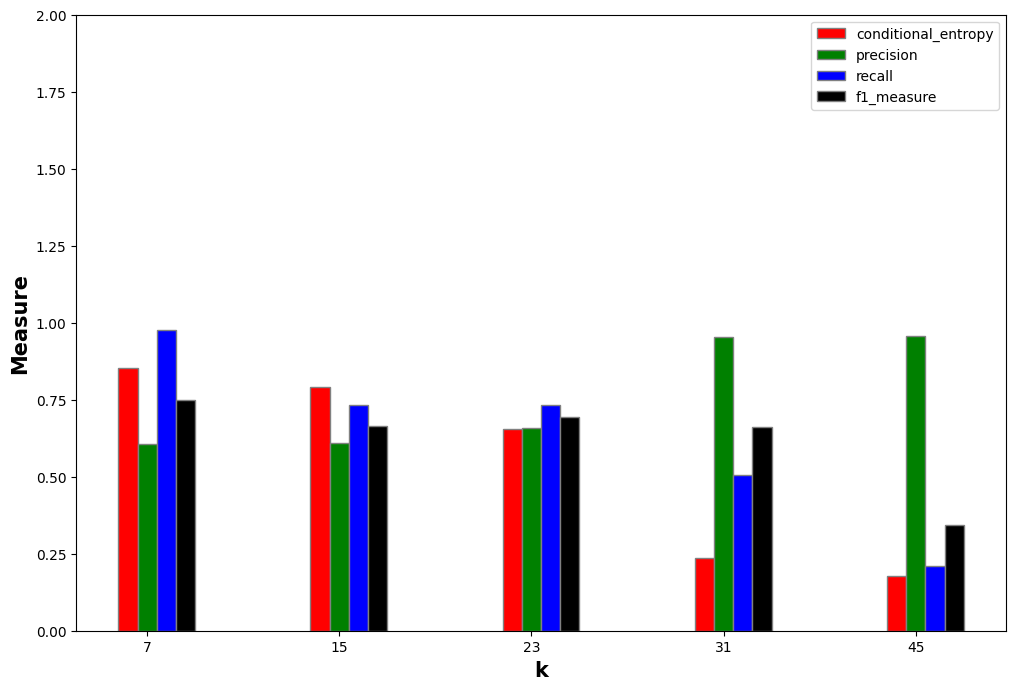

In [ ]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(len(k_kmeans))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
recall_1d = np.ravel(recall_array).copy()
f1_measure_1d = np.ravel(f1_measure_array).copy()
# Make the plot
plt.bar(br1, conditional_entropy_array, color ='r', width = barWidth,
        edgecolor ='grey', label ='conditional_entropy')
plt.bar(br2, precision_array, color ='g', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3, recall_1d, color ='b', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br4, f1_measure_1d, color ='k', width = barWidth,
        edgecolor ='grey', label ='f1_measure')
 
# Adding Xticks
plt.xlabel('k', fontweight ='bold', fontsize = 15)
plt.ylabel('Measure', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(k_kmeans))],
        k_kmeans)
plt.ylim(0,2)
plt.legend()
plt.show()


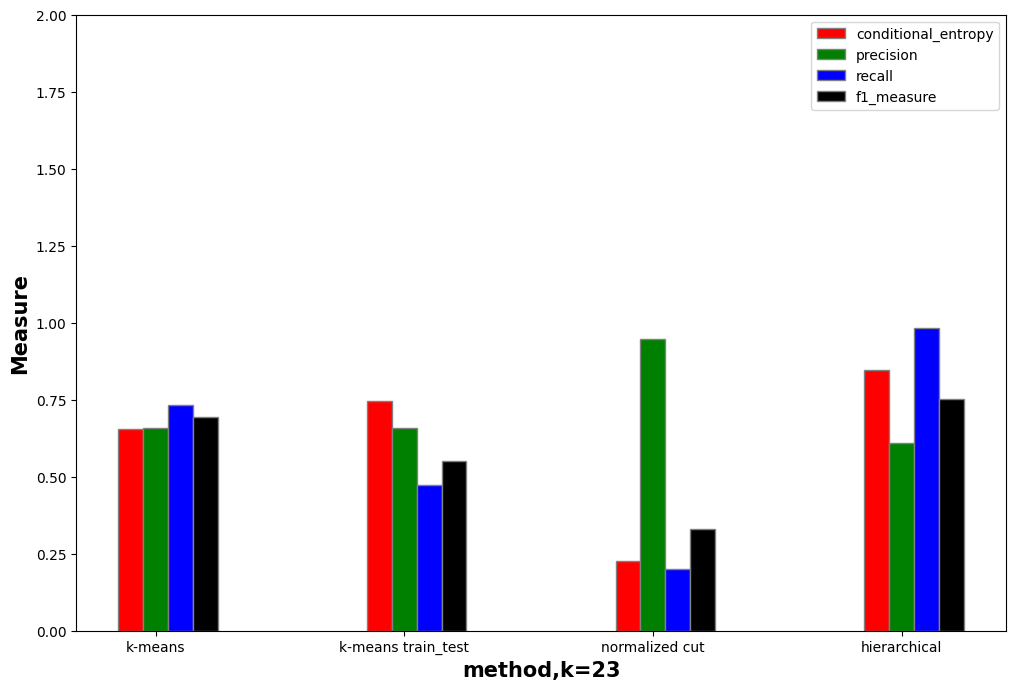

In [ ]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
conditional_entropy_all = [value, value_combined, value_ncut, value_hier]
precision_all = [precision ,precision_combined, precision_ncut, precision_hier]
recall_all = [recall, recall_combined ,recall_ncut, recall_hier]
f1_measure_all = [f1_measure_kmeans_weighted, f1_measure_combined_weighted, f1_measure_ncut_weighted, f1_measure_hier_weighted]
recall_all_1d = np.ravel(recall_all).copy()
f1_measure_all_1d = np.ravel(f1_measure_all).copy()
# Make the plot
plt.bar(br1, conditional_entropy_all, color ='r', width = barWidth,
        edgecolor ='grey', label ='conditional_entropy')
plt.bar(br2, precision_all, color ='g', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br3, recall_all_1d, color ='b', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br4, f1_measure_all_1d, color ='k', width = barWidth,
        edgecolor ='grey', label ='f1_measure')
 
# Adding Xticks
plt.xlabel('method,k=23', fontweight ='bold', fontsize = 15)
plt.ylabel('Measure', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)],
        ['k-means','k-means train_test','normalized cut','hierarchical'])
plt.ylim(0,2)
plt.legend()
plt.show()
